In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models


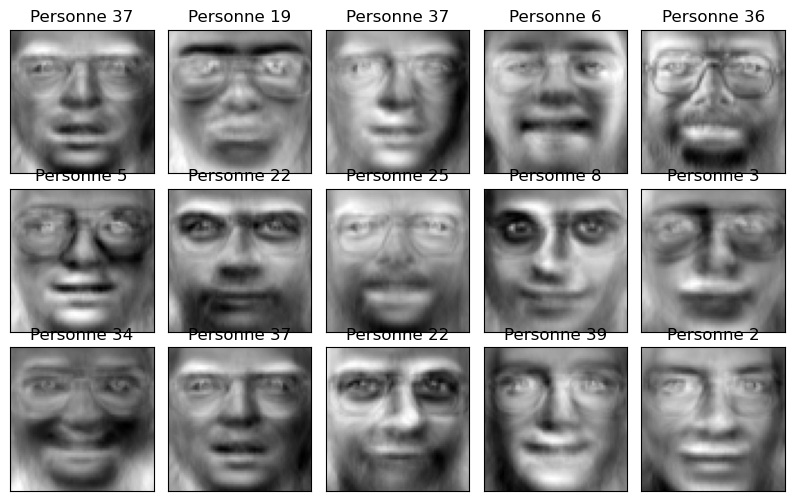

In [2]:

# Charger l'ensemble de données ORL
donnees = fetch_olivetti_faces()
images = donnees.images
cibles = donnees.target

# Réduction du nombre de composantes PCA
acp = PCA(n_components=20)  # Réduction à 20 composantes principales
images_aplaties = images.reshape(images.shape[0], -1)
images_normalisees = StandardScaler().fit_transform(images_aplaties)
images_reduites = acp.fit_transform(images_normalisees)
images_reconstruites = acp.inverse_transform(images_reduites).reshape(images.shape)

# Afficher les images reconstruites
def afficher_images(images, cibles, num_lignes=3, num_colonnes=5):
    fig, axes = plt.subplots(num_lignes, num_colonnes, figsize=(10, 6),
                             subplot_kw={'xticks': [], 'yticks': []},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    num_images = num_lignes * num_colonnes
    indices = np.random.choice(len(images), size=num_images, replace=False)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[indices[i]], cmap='gray')
        ax.set_title(f"Personne {cibles[indices[i]]}")
    plt.show()

afficher_images(images_reconstruites, cibles)






Epoch 1/20


10/10 [==============================] - 5s 122ms/step - loss: 3.4207 - accuracy: 0.0969 - val_loss: 2.9660 - val_accuracy: 0.1375
Epoch 2/20
10/10 [==============================] - 1s 77ms/step - loss: 2.1757 - accuracy: 0.3750 - val_loss: 1.5599 - val_accuracy: 0.5500
Epoch 3/20
10/10 [==============================] - 1s 74ms/step - loss: 0.9034 - accuracy: 0.7312 - val_loss: 0.9644 - val_accuracy: 0.7500
Epoch 4/20
10/10 [==============================] - 1s 77ms/step - loss: 0.4028 - accuracy: 0.9000 - val_loss: 0.5387 - val_accuracy: 0.8250
Epoch 5/20
10/10 [==============================] - 1s 73ms/step - loss: 0.1862 - accuracy: 0.9344 - val_loss: 0.5568 - val_accuracy: 0.8875
Epoch 6/20
10/10 [==============================] - 1s 74ms/step - loss: 0.1614 - accuracy: 0.9531 - val_loss: 0.5511 - val_accuracy: 0.8875
Epoch 7/20
10/10 [==============================] - 1s 80ms/step - loss: 0.1440 - accuracy: 0.9531 - val_loss: 0.4280 - val_accuracy: 0.8875
Epoch 8

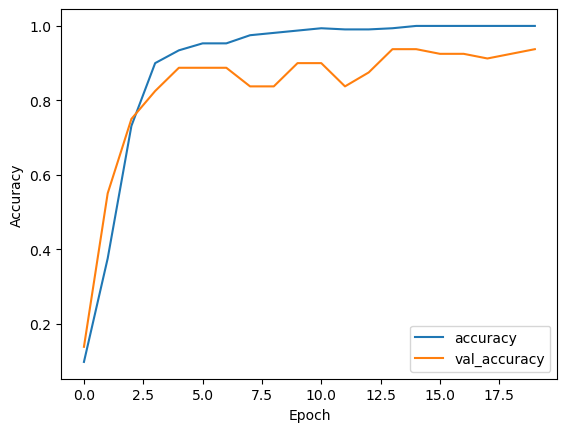

In [3]:
# Diviser les données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(images_reconstruites, cibles, test_size=0.2, random_state=42)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Créer un modèle CNN plus simple
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(40, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Évaluer le modèle
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Afficher les courbes d'apprentissage
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
